In [2]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [4]:
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [6]:
fish.columns

Index(['Species', 'Weight', 'Length', 'Diagonal', 'Height', 'Width'], dtype='object')

In [7]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [12]:
fish_target = fish['Species'].to_numpy()

In [14]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [15]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

# k-최근접 이웃의 다중 분류

In [16]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors = 3)
kn.fit(train_scaled, train_target)

KNeighborsClassifier(n_neighbors=3)

In [17]:
print(kn.score(train_scaled, train_target))

0.8907563025210085


In [18]:
print(kn.score(test_scaled, test_target))

0.85


In [19]:
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [20]:
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [21]:
import numpy as np

In [22]:
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))
# 5개의 샘플이 행으로 나와있고, 7개의 생선(클래스)에 대해서 확률이 출력된다

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [23]:
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


# 로지스틱 회귀

In [24]:
# 이름은 회귀이지만 분류 알고리즘

# 

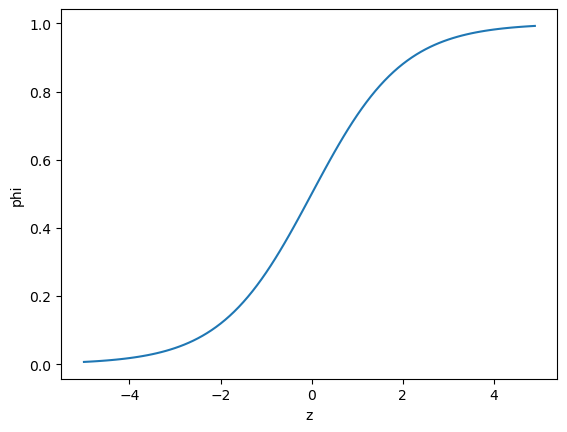

In [25]:
import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

## 로지스틱 회귀(이진 분류)

In [26]:
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


In [27]:
# 도미와 빙어 골라내기
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [28]:
# 도미와 빙어 데이터만 골라냈다. 이 데이터로 로지스틱 회귀 모델을 훈련해보자
# LogisticRegression 클래스는 선형 모델이므로 sklearn.linear_model 패키지에 있다
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [29]:
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [30]:
# 예측 확률 predict_proba() 메서드
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [31]:
print(lr.classes_)

['Bream' 'Smelt']


# 로지스틱 회귀 계수 확인

In [32]:
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [33]:
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [34]:
from scipy.special import expit # 시그모이드를 거친 확률값
print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


# 로지스틱 회귀(다중 분류)

In [35]:
# 도미랑 빙어를 따로 뽑아내지않고 7개생선을 분류
lr = LogisticRegression(C=20, max_iter=1000) 
#로지스틱 회귀 L2노름 규제 기본적용, C=규제를 제어하는 매개변수 ,  #max_iter=반복횟수
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [37]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [36]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [39]:
print(lr.classes_) #classes_ 속성에서 클래스 정보 확인

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [40]:
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


In [41]:
# 이진 분류에서는 시그모이드 함수를 사용해 z를 0과 1사이의 값으로 반환
# 다중 분류는 이와 달리 소프트맥스(softmax)함수를 사용하여 7개의 z값을 확률로 변환

# 소프트맥스 함수

In [42]:
# 먼저 테스트 세트의 처음 5개 샘플에 대한 z1~z7의 값을 구해보자
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [43]:
from scipy.special import softmax
proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [ ]:
"""
앞서 구한 decision 배열을 softmax() 함수에 전달. softmax()의 axis 매개변수는 소프트 맥스를
계산할 축을 지정. 여기에서는 axis=1로 지정하여 각 행, 즉 각 샘플에 대해 소프트 맥스를 계산.
만약 axis 매개변수를 지정하지 않으면 배열 전체에 대해 소프트맥스를 계산한다.
"""